# Section 4 - Avoiding data overinterpretation
## Example 4.3
**Application 4.3**: Different entanglements have different structural and topological features.  We need to compute corrected *p*-values for these features to determine which ones have a significant influence on whether a protein is linked to disease. 

* Before running the code cells below, take a minute to think about:
    * What steps will you need to take to correct the *p*-values?
    * How can you check the number of false positives that you have eliminated?

### Step 0 - Load libraries

In [6]:
import pandas as pd
from statsmodels.stats.multitest import multipletests
import matplotlib.pyplot as plt
import numpy as np

### Step 1 - Load the data

In [7]:
data_path = "/home/jovyan/data-store/data/iplant/home/shared/NCEMS/BPS-training-2025/"
use_cols = ["metric", "percentile", "p_value"]
data11 = pd.read_csv(data_path + "disease-assoc_p-values.csv", usecols = use_cols)

### Step 2 - Explore the data

In [8]:
# print a quick summary of "data9"
data11.info()

# print the first 10 rows of "data9"
data11.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   metric      39 non-null     object 
 1   percentile  39 non-null     object 
 2   p_value     39 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.0+ KB


,metric,percentile,p_value
0,Gn,95%,0.003915
1,Gc,95%,0.010591
2,Gmax,95%,0.000615
3,Gsum,95%,0.000453
4,N_term_thread,95%,0.002289
5,C_term_thread,95%,0.028696
6,ENT.ID,95%,0.000006
7,num_zipper_nc,95%,0.000001
8,num_loop_contacting_res,95%,0.000002
9,num_cross_nearest_neighbors,95%,0.000001


* From this exploration of the data, we can see that there are thirteen different entanglement parameters in the `metric` column
* Each of these different `metric` values was tested for its ability to predict linkage to disease using three different thresholds for when a gene is linked with disease; this leads to the `percentile` column containing the values `50%`, `75%`, `95%`
    * We will focus on the `50%` data in this analysis, so we select only these rows in the cell below

In [9]:
# remove rows that do not correspond to 50th percentile disease linkage calculations
data11 = data11[data11["percentile"] == "50%"]

data11.info()

data11.head(20)

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, 26 to 38
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   metric      13 non-null     object 
 1   percentile  13 non-null     object 
 2   p_value     13 non-null     float64
dtypes: float64(1), object(2)
memory usage: 416.0+ bytes


,metric,percentile,p_value
26,Gn,50%,0.170747
27,Gc,50%,0.146616
28,Gmax,50%,0.042154
29,Gsum,50%,0.041896
30,N_term_thread,50%,0.000123
31,C_term_thread,50%,0.155682
32,ENT.ID,50%,0.000333
33,num_zipper_nc,50%,0.000238
34,num_loop_contacting_res,50%,0.000043
35,num_cross_nearest_neighbors,50%,0.000164


* We are left with 13 rows, each with an associated *p*-value

### Step 3 - Run the analysis

Using the uncorrected p-values, we would conclude 7 features are significant
Using the corrected p-values, we would conclude 5 features are significant


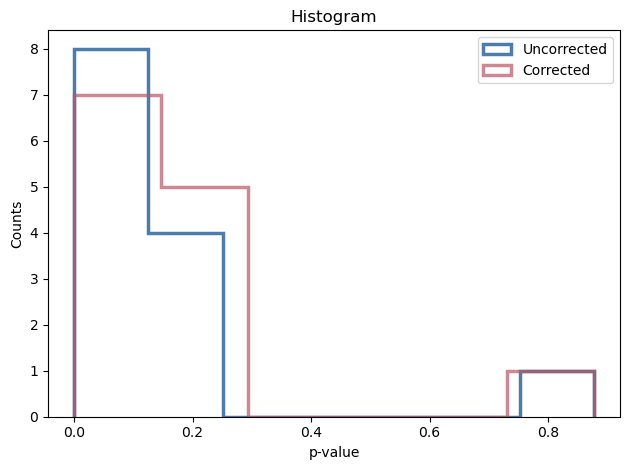

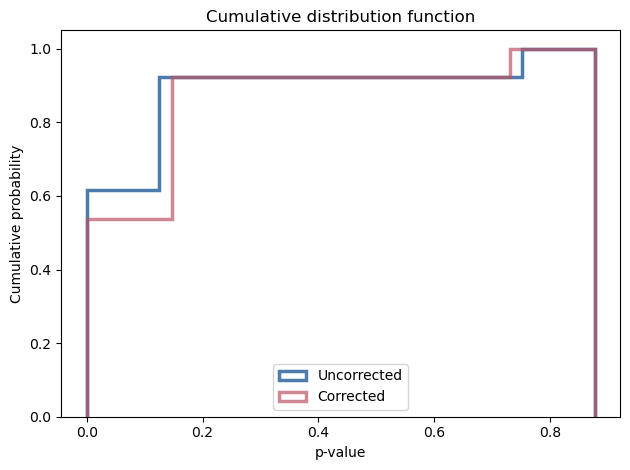

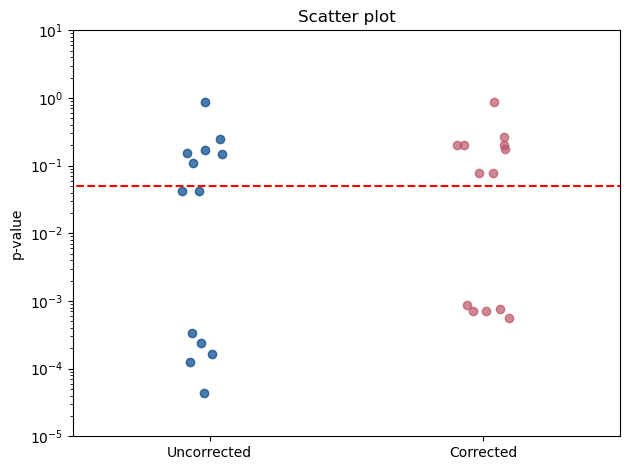

In [10]:
# define the significance level for our tests
alpha = 0.05

# apply the Benjamini-Hochberg procedure for FDR correction
_, pvals_corrected, _, _ = multipletests(data11['p_value'], alpha = alpha, method = 'fdr_bh')

# add corrected p-values as a new column
data11['p_value_adjust'] = pvals_corrected

# compute the proportion of uncorrected p-values < alpha
N_uncorr_acc = (data11['p_value'] < alpha).sum()
N_corr_acc   = (data11['p_value_adjust'] < alpha).sum()
print ("Using the uncorrected p-values, we would conclude", N_uncorr_acc, "features are significant")
print ("Using the corrected p-values, we would conclude", N_corr_acc, "features are significant")

# make a plot of the distribution of p-values before & after the FDR correction
plt.clf()
plt.title("Histogram")
plt.hist(data11["p_value"], color = "#004488", alpha = 0.7, label = "Uncorrected", histtype = "step", bins = "fd", linewidth=2.5) # here, alpha != significance level
plt.hist(data11["p_value_adjust"], color = "#BB5566", alpha = 0.7, label = "Corrected", histtype = "step", bins = "fd", linewidth=2.5)
plt.xlabel("p-value")
plt.ylabel("Counts")
plt.legend(loc = "best")
plt.tight_layout()
plt.show()

# make a plot of the cumulative distribution function of p-values before & after the FDR correction
plt.clf()
plt.title("Cumulative distribution function")
plt.hist(data11["p_value"], color = "#004488", alpha = 0.7, label = "Uncorrected", histtype = "step", bins = "fd", cumulative = True, density = True, linewidth=2.5) # here, alpha != significance level
plt.hist(data11["p_value_adjust"], color = "#BB5566", alpha = 0.7, label = "Corrected", histtype = "step", bins = "fd", cumulative = True, density = True, linewidth=2.5)
plt.xlabel("p-value")
plt.ylabel("Cumulative probability")
plt.legend(loc = "best")
plt.tight_layout()
plt.show()

# make an additional plot showing the p-values

np.random.seed(1)
jitter1 = np.random.uniform(-0.1, 0.1, size=13)
jitter2 = np.random.uniform(-0.1, 0.1, size=13)

plt.clf()
plt.title("Scatter plot")
plt.scatter(np.ones(13) + jitter1, data11["p_value"],  color = "#004488", alpha = 0.7, label = "Uncorrected")#, marker = "_")
plt.scatter(2.0*np.ones(13) + jitter2, data11["p_value_adjust"],  color = "#BB5566", alpha = 0.7, label = "Corrected")#, marker = "_")
plt.plot([0, 3], [0.05, 0.05], "r--")
plt.xlim(0.5, 2.5)
plt.xticks([1, 2], ["Uncorrected", "Corrected"])
plt.yscale('log')
plt.ylim(1E-5, 10)
plt.ylabel("p-value")
plt.tight_layout()
plt.show()

### Step 4 - Interpret the results

* Think about what we can conclude based on this analysis. Consider the following:
    * How many false positives have you eliminated?
* Once you are confident in your answers, discuss them with someone sitting near you. 